In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the wind farm boundary (polygon)
corner_coordinates = np.array([
    (726582, 4188725),
    (770896, 4187322),
    (770174, 4166709),
    (725780, 4168233)
])

# Compute edges from the polygon
edges = list(zip(corner_coordinates, np.roll(corner_coordinates, shift=-1, axis=0)))

# Structure for wind turbines: Each type has different coordinates and dimensions
turbine_types = {
    "Type V90": {
        "coordinates": np.array([
            (763033, 4186964), (762796, 4186853), (762818, 4184333), (763075, 4184372), (763381, 4184293), (763668, 4184298), (764058, 4184461), (764340, 4184471), (763221, 4178982), (763458, 4179100), (763749, 4179194), (764021, 4179159), (767277, 4178873), (767544, 4178883), (767816, 4178907)
        ]),
        "rotor_radius": 45,  # meters
        "rotor_min_height": 35,  # meters
        "rotor_max_height": 125  # meters
    },
    "Type V100": {
        "coordinates": np.array([
            (766808, 4178399), (767070, 4178646)
        ]),
        "rotor_radius": 50,
        "rotor_min_height": 30,
        "rotor_max_height": 120
    },
    "Type V110": {
        "coordinates": np.array([
            (762781, 4180123), (762563, 4179891), (757373, 4180523), (757724, 4180434), (758025, 4180419), (758608, 4180301), (759043, 4180044), (759226, 4180212)
        ]),
        "rotor_radius": 55,
        "rotor_min_height": 25,
        "rotor_max_height": 135
    },
    "Type V120": {
        "coordinates": np.array([
            (762578, 4186704), (762475, 4186307), (762341, 4185966), (767855, 4184283), (768092, 4184575), (768577, 4184955), (769026, 41844926), (765498, 4182065), (765716, 4181294), (765884, 4180563), (762109, 4179347), (762593, 4179298), (763151, 4179910), (763156, 4178567), (756494, 4181887), (756854, 4181758), (753571, 4181561), (753917, 4181353), (754238, 4181170), (753289, 4180790), (754994, 4180553), (753289, 4180736), (753789, 4180464), (754218, 4180266), (754604, 4179980), (754984, 4179654), (754520, 4179046), (752998, 4179436), (753383, 4179110), (753808, 4178680), (754189, 4178245), (754791, 4178166)
        ]),
        "rotor_radius": 60,
        "rotor_min_height": 20,
        "rotor_max_height": 140
    }
}

# Bird flight parameters
bird_wingspan = 0.625 # meters
min_flight_height = 10  # meters
max_flight_height = 250  # meters
num_simulations = 10000

# Initialize collision tracking
collision_counts = {turbine_type: 0 for turbine_type in turbine_types.keys()}
total_collisions = 0

# Run simulations
for _ in range(num_simulations):
    # Select a random entry edge
    entry_edge_idx = np.random.randint(len(edges))
    (x1, y1), (x2, y2) = edges[entry_edge_idx]

    # Generate a random entry point along this edge
    t_entry = np.random.uniform(0, 1)
    x_start = x1 + t_entry * (x2 - x1)
    y_start = y1 + t_entry * (y2 - y1)

    # Select a different edge for exit
    exit_edge_idx = (entry_edge_idx + np.random.randint(1, len(edges))) % len(edges)
    (x1_exit, y1_exit), (x2_exit, y2_exit) = edges[exit_edge_idx]

    # Generate a random exit point along the exit edge
    t_exit = np.random.uniform(0, 1)
    x_end = x1_exit + t_exit * (x2_exit - x1_exit)
    y_end = y1_exit + t_exit * (y2_exit - y1_exit)

    # Compute flight angle based on entry and exit points
    flight_angle = np.degrees(np.arctan2(y_end - y_start, x_end - x_start))

    # Assign random flight height
    flight_height = np.random.uniform(min_flight_height, max_flight_height)

    # Compute horizontal trajectory
    trajectory_slope = np.tan(np.radians(flight_angle))
    trajectory_intercept = y_start - trajectory_slope * x_start

    # Check for collision with each turbine type
    for turbine_type, data in turbine_types.items():
        for tx, ty in data["coordinates"]:
            y_at_turbine = trajectory_slope * tx + trajectory_intercept

            # Check if the bird's wingspan overlaps the rotor area
            if (ty - data["rotor_radius"] - bird_wingspan / 2) <= y_at_turbine <= (ty + data["rotor_radius"] + bird_wingspan / 2):
                if data["rotor_min_height"] <= flight_height <= data["rotor_max_height"]:
                    collision_counts[turbine_type] += 1
                    total_collisions += 1
                    break  # Only count one collision per flight

# Compute collision probability
collision_probability = total_collisions / num_simulations

# Print results
print(f"Total Simulations: {num_simulations}")
print(f"Total Collisions: {total_collisions}")
print(f"Collision Probability: {collision_probability:.4f}")

print("\nCollisions by Turbine Type:")
for turbine_type, count in collision_counts.items():
    print(f"{turbine_type}: {count}")


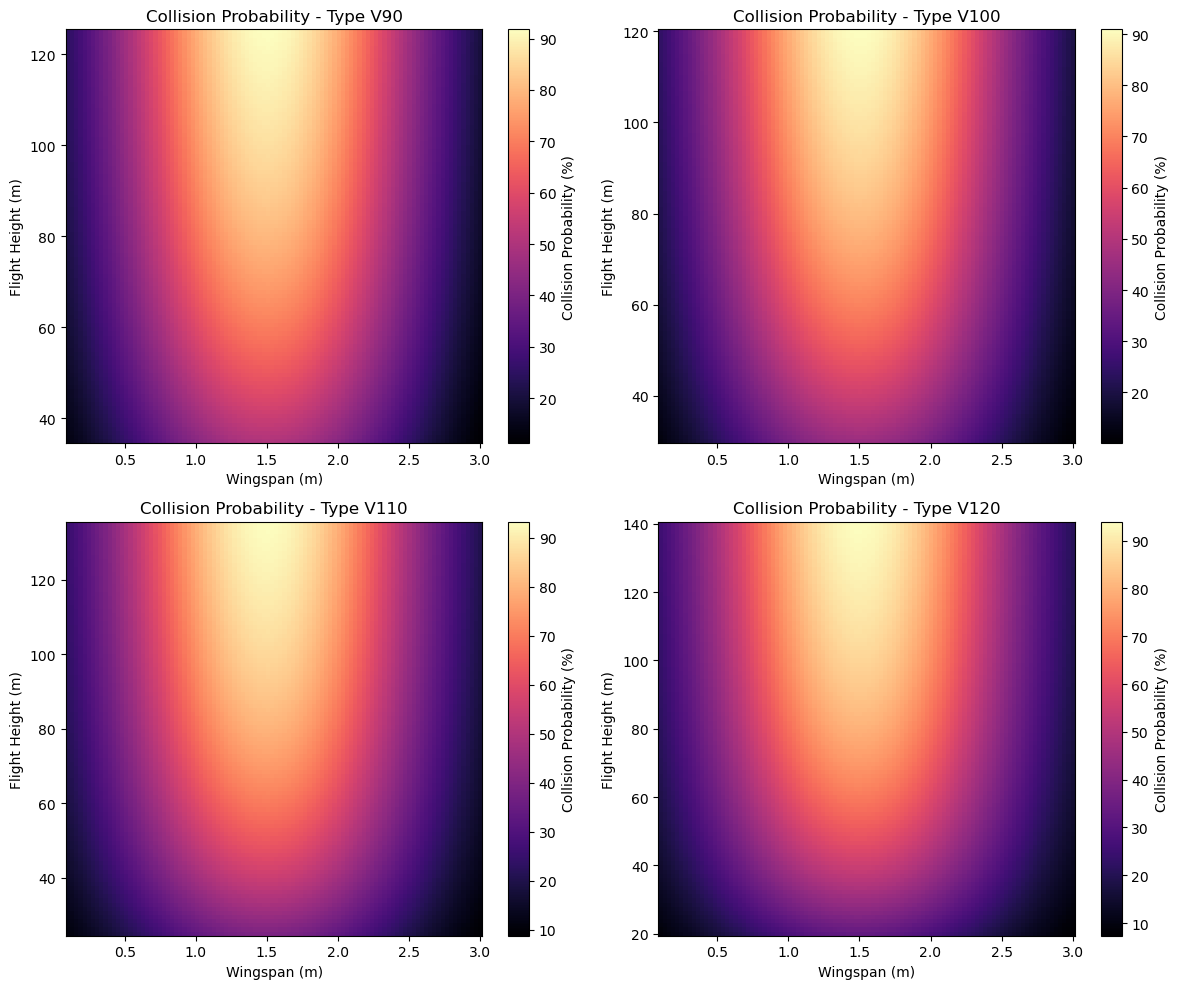

In [206]:
import numpy as np
import matplotlib.pyplot as plt

# Define wind turbine types with their specific rotor heights
turbine_types = {
    "Type V90": {"rotor_min_height": 35, "rotor_max_height": 125},
    "Type V100": {"rotor_min_height": 30, "rotor_max_height": 120},
    "Type V110": {"rotor_min_height": 25, "rotor_max_height": 135},
    "Type V120": {"rotor_min_height": 20, "rotor_max_height": 140}
}

# Define wingspan and flight height ranges
wingspan_values = np.linspace(0.1, 3.0, 100)  # Wingspan from 0.1m to 3.0m

# Create figure for 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Generate heatmap for each turbine type
for i, (turbine, data) in enumerate(turbine_types.items()):
    flight_heights = np.linspace(data["rotor_min_height"], data["rotor_max_height"], 100)
    
    # Create a meshgrid
    W, H = np.meshgrid(wingspan_values, flight_heights)
    
    # Simulated collision probability function (example function)
    collision_prob = np.exp(-((W - 1.5) ** 2) / 1.5) * (1 - np.exp(-H / 50)) * 100
    
    # Plot heatmap
    ax = axes[i]
    hb = ax.pcolormesh(W, H, collision_prob, shading='auto', cmap="magma")
    
    # Add color bar
    cb = fig.colorbar(hb, ax=ax)
    cb.set_label("Collision Probability (%)")
    
    # Labels and title
    ax.set_xlabel("Wingspan (m)")
    ax.set_ylabel("Flight Height (m)")
    ax.set_title(f"Collision Probability - {turbine}")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()